In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df1=pd.read_csv('Titanic.csv')
df1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
df1.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [4]:
df1.shape

(418, 2)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
df1.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.387560
std,120.810458,0.487777
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [7]:
df1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
df1.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [9]:
df1.corr()

,PassengerId,Survived
PassengerId,1.000000,-0.024295
Survived,-0.024295,1.000000


In [10]:
df1.cov()

,PassengerId,Survived
PassengerId,14595.166667,-1.431655
Survived,-1.431655,0.237926


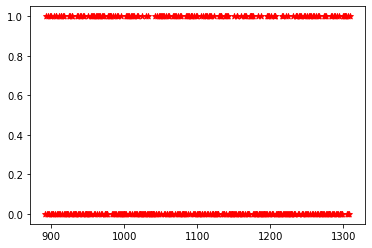

In [11]:
plt.scatter(df1.PassengerId,df1.Survived,marker='*',color='r')

Note : due to discrete formation data point there no linear relation between them ,sigmoid graph is formed so we can go with logistic regression and classifier .

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x=df1[['PassengerId']]

In [15]:
x

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [16]:
y=df1.Survived
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [32]:
x_train.shape

(334, 1)

In [22]:
x_test.shape

(84, 1)

In [23]:
y_train.shape

(334,)

In [24]:
y_test.shape

(84,)

In [ ]:
# Testing Data Evaluation

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()
model

LogisticRegression()

In [29]:
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred=model.predict(x_test)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
model.predict([[4]])

array([0], dtype=int64)

In [35]:
model.score(x_test,y_test)*100

66.66666666666666

In [ ]:
#this model is Underfit,so train error is high and test error is low .
#so we use kfold cross validation hyper parameter grid search cv,lasso and rich

In [42]:
from sklearn.model_selection import cross_val_score 

In [43]:
LRC=cross_val_score(LogisticRegression(),x,y,cv=3)

In [44]:
LRC_L=np.mean(LRC)*100

In [45]:
LRC_L

61.24357656731757

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        56
           1       0.00      0.00      0.00        28

    accuracy                           0.67        84
   macro avg       0.33      0.50      0.40        84
weighted avg       0.44      0.67      0.53        84



In [39]:
cnf_matrix=confusion_matrix(y_test,y_test)
cnf_matrix

array([[56,  0],
       [ 0, 28]], dtype=int64)

- [TP   FP
- FN   TN]

- 1datapoint
    
- TP:acutal class 1 and predicated class is 1
- FP:acutal class 0 and predicated class is 1   A
- FN:acutal class 1 and predicated class is 0   B
- TN:acutal class 0 and predicated class is 0

In [40]:
acc_score=accuracy_score(y_test,y_pred)
print(acc_score)

0.6666666666666666


In [41]:
# Traing Data Evaluation
y_pred_train=model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print(cnf_matrix)

acc_score=accuracy_score(y_train,y_pred_train)
print(acc_score)

clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

[[200   0]
 [134   0]]
0.5988023952095808
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       200
           1       0.00      0.00      0.00       134

    accuracy                           0.60       334
   macro avg       0.30      0.50      0.37       334
weighted avg       0.36      0.60      0.45       334

